# Imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Read in the data:

In [3]:
book_tags = pd.read_csv('ignore/book_tags.csv')
books = pd.read_csv('ignore/books.csv')
ratings = pd.read_csv('ignore/ratings.csv')
tags = pd.read_csv('ignore/tags.csv')
to_read = pd.read_csv('ignore/to_read.csv')

In [4]:
print(book_tags.shape)
print(books.shape)
print(ratings.shape)
print(tags.shape)
print(to_read.shape)

(999912, 3)
(10000, 23)
(5976479, 3)
(34252, 2)
(912705, 2)


While more data is better... for the purpose of memory usage for this project I am going to randomly pick 50,000 data points from the over 5 million data points in the ratings.csv

In [5]:
ratings.isna().sum()

user_id    0
book_id    0
rating     0
dtype: int64

> There are no missing values, so I cannot just delete null items

In [14]:
ratings.user_id.value_counts().count()

53424

> 53,424 unique users

In [15]:
ratings.book_id.value_counts().count()

10000

> 10,000 unique books

In [17]:
ratings_sample = ratings.sample(n = 50000, replace = False)

In [18]:
ratings_sample.head()

,user_id,book_id,rating
4798877,4034,1876,2
4809559,107,8649,2
1249425,18457,6398,5
4397630,3583,8184,5
381270,7994,154,2


In [19]:
ratings_sample.isna().sum()

user_id    0
book_id    0
rating     0
dtype: int64

In [34]:
ratings_sample.user_id.value_counts().count()

32009

32,009 unique users in this sample, with some repeats

In [35]:
ratings_sample.book_id.value_counts().count()

8393

> 8,393 unique books... I want all 10,000 books included so I may re-sample

In [36]:
ratings_sample.rating.value_counts().count()

5

> All 5 different ratings are represented

Let's try a resample with 100,000 instead...

In [57]:
ratings_sample = ratings.sample(n = 100000, replace = False, random_state=1002)

In [58]:
ratings_sample.head()

,user_id,book_id,rating
2186601,29403,102,5
2858642,36128,4663,4
4280792,37112,25,5
1026306,16114,693,4
5672837,50684,1731,4


In [59]:
ratings_sample.isna().sum()

user_id    0
book_id    0
rating     0
dtype: int64

In [60]:
ratings_sample.user_id.value_counts().count()

44364

> 44,364 unique users

In [61]:
ratings_sample.book_id.value_counts().count()

9523

> 9523 unique books... this is not the full 10,000 but close enough for my liking

In [82]:
# Checking to make sure that some of my favorite books are included in this sample... because what would a good recommender system be if it doesn't include my favorites
# ratings_sample.loc[ratings_sample['book_id'] == 30]

In [83]:
ratings_sample.to_csv('ratings_sample.csv', index=False)

In [84]:
ratings_sample.shape

(100000, 3)

Now, let's merge the book df with it

In [85]:
ratings_and_books = pd.merge(ratings_sample, books, how='left', on='book_id')
ratings_and_books.head()

,user_id,book_id,rating,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,29403,102,5,19543,19543,3020535,110,99408392,9.780099e+12,Maurice Sendak,1963.0,Where the Wild Things Are,Where the Wild Things Are,eng,4.22,620618,636061,9102,15392,27532,93700,167043,332394,https://images.gr-assets.com/books/1384434560m...,https://images.gr-assets.com/books/1384434560s...
1,36128,4663,4,64081,64081,2827103,19,310266300,9.780310e+12,Shane Claiborne,2006.0,The Irresistible Revolution: Living as an Ordi...,The Irresistible Revolution: Living as an Ordi...,NaN,4.07,18566,19186,953,409,977,3435,6486,7879,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
2,37112,25,5,136251,136251,2963218,263,545010225,9.780545e+12,"J.K. Rowling, Mary GrandPré",2007.0,Harry Potter and the Deathly Hallows,Harry Potter and the Deathly Hallows (Harry Po...,eng,4.61,1746574,1847395,51942,9363,22245,113646,383914,1318227,https://images.gr-assets.com/books/1474171184m...,https://images.gr-assets.com/books/1474171184s...
3,16114,693,4,455373,455373,2651694,122,345418972,9.780345e+12,Michael Crichton,1987.0,Sphere,Sphere,eng,3.77,128244,135005,2313,1851,9728,40085,49513,33828,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
4,50684,1731,4,6736971,6736971,6527274,37,345503813,9.780346e+12,Peter V. Brett,2010.0,The Desert Spear,"The Desert Spear (Demon Cycle, #2)",eng,4.24,53143,58608,1927,555,1691,7805,21853,26704,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...


Make sure the counts are all the same...

In [86]:
ratings_and_books.shape

(100000, 25)

In [87]:
ratings_and_books.user_id.value_counts().count()

44364

In [88]:
ratings_and_books.book_id.value_counts().count()

9523

Let's drop unwanted columns:

In [90]:
ratings_and_books = ratings_and_books[['user_id', 'book_id', 'rating', 'authors', 'original_publication_year', 'title', 'language_code', 'average_rating', 'ratings_count']]
ratings_and_books.head()

,user_id,book_id,rating,authors,original_publication_year,title,language_code,average_rating,ratings_count
0,29403,102,5,Maurice Sendak,1963.0,Where the Wild Things Are,eng,4.22,620618
1,36128,4663,4,Shane Claiborne,2006.0,The Irresistible Revolution: Living as an Ordi...,NaN,4.07,18566
2,37112,25,5,"J.K. Rowling, Mary GrandPré",2007.0,Harry Potter and the Deathly Hallows (Harry Po...,eng,4.61,1746574
3,16114,693,4,Michael Crichton,1987.0,Sphere,eng,3.77,128244
4,50684,1731,4,Peter V. Brett,2010.0,"The Desert Spear (Demon Cycle, #2)",eng,4.24,53143


In [91]:
ratings_and_books.shape

(100000, 9)

In [92]:
ratings_and_books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   user_id                    100000 non-null  int64  
 1   book_id                    100000 non-null  int64  
 2   rating                     100000 non-null  int64  
 3   authors                    100000 non-null  object 
 4   original_publication_year  99897 non-null   float64
 5   title                      100000 non-null  object 
 6   language_code              94350 non-null   object 
 7   average_rating             100000 non-null  float64
 8   ratings_count              100000 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 7.6+ MB


> Missing values in publication year and language code

In [118]:
ratings_and_books.loc[ratings_and_books['original_publication_year'].isna() == True ].head()

,user_id,book_id,rating,authors,original_publication_year,title,language_code,average_rating,ratings_count
916,35864,3506,5,Yuu Watase,NaN,"Absolute Boyfriend, Vol. 1",eng,4.01,29385
1284,36516,5872,5,Charles Dickens,NaN,A Tale of Two Cities / Great Expectations,en-US,3.98,14912
2288,36072,7417,4,"Giles Andreae, Guy Parker-Rees",NaN,Giraffes Can't Dance,en-US,4.28,14144
4650,13903,4708,5,BookRags,NaN,BookRags Summary: A Storm of Swords,eng,4.59,18960
4938,37309,5872,3,Charles Dickens,NaN,A Tale of Two Cities / Great Expectations,en-US,3.98,14912


In [102]:
100000-99897

103

In [111]:
ratings_and_books.original_publication_year.value_counts().sort_values().head(20)

 1867.0    1
 1863.0    1
 1519.0    1
 1764.0    1
 1785.0    1
 1651.0    2
 1353.0    2
 1677.0    2
 1550.0    2
 1767.0    2
 1589.0    2
 1554.0    2
 1641.0    2
 1590.0    3
 1796.0    3
 1781.0    3
-440.0     3
 1418.0    4
 119.0     4
 1563.0    4
Name: original_publication_year, dtype: int64

In [121]:
ratings_and_books.loc[ratings_and_books['language_code'].isna() == True ].head()

,user_id,book_id,rating,authors,original_publication_year,title,language_code,average_rating,ratings_count
1,36128,4663,4,Shane Claiborne,2006.0,The Irresistible Revolution: Living as an Ordi...,NaN,4.07,18566
33,1159,9927,4,Christopher Buckley,1994.0,Thank You for Smoking,NaN,3.92,9054
62,46941,1497,2,"Mary Norton, Beth Krush, Joe Krush",1952.0,"The Borrowers (The Borrowers, #1)",NaN,4.02,74820
91,36984,4704,3,Jeanette Winterson,2011.0,Why Be Happy When You Could Be Normal?,NaN,3.94,19537
93,30813,5878,5,Diane Muldrow,1992.0,Frosty the Snowman (Frosty the Snowman),NaN,4.34,17540


In [122]:
100000 - 94350

5650

In [124]:
ratings_and_books.language_code.fillna('unknown', inplace=True)

In [125]:
ratings_and_books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   user_id                    100000 non-null  int64  
 1   book_id                    100000 non-null  int64  
 2   rating                     100000 non-null  int64  
 3   authors                    100000 non-null  object 
 4   original_publication_year  99897 non-null   float64
 5   title                      100000 non-null  object 
 6   language_code              100000 non-null  object 
 7   average_rating             100000 non-null  float64
 8   ratings_count              100000 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 7.6+ MB


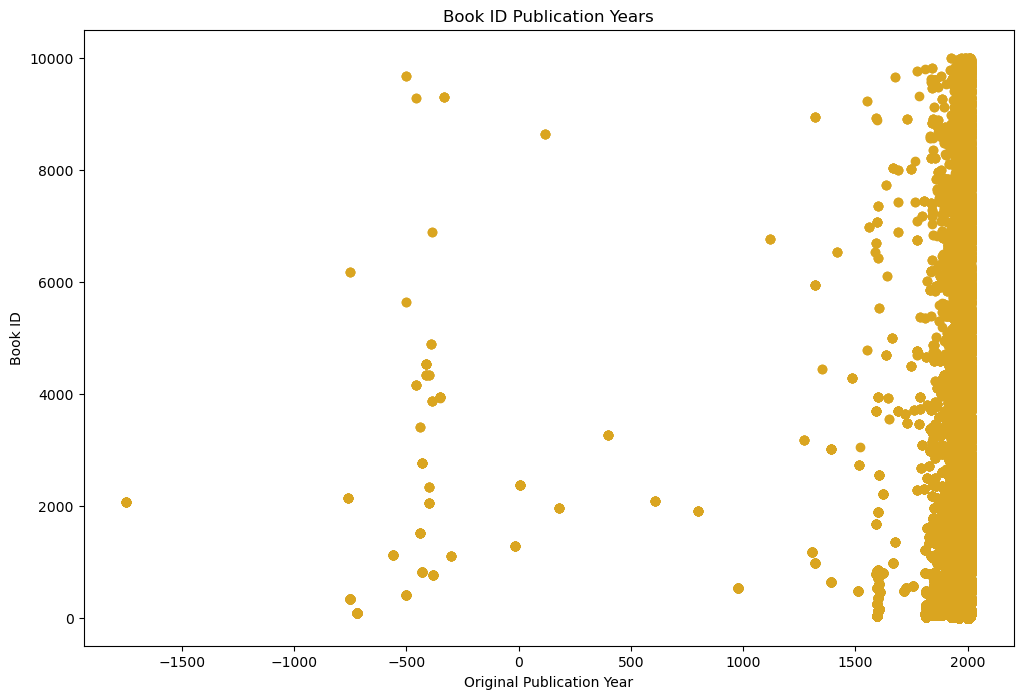

In [144]:
plt.figure(figsize=(12,8))
plt.scatter(ratings_and_books.original_publication_year, ratings_and_books.book_id, color = 'goldenrod')
plt.ylabel('Book ID')
plt.xlabel('Original Publication Year')
plt.title('Book ID Publication Years');

# plt.savefig('book_id_pub_year.png')

In [142]:
ratings_and_books.original_publication_year.mean()

1967.8362613491897

In [145]:
def pub_date_category(publication_date):
    if publication_date < 1900:
        return "Pre-1900s"
    elif 1900 <= publication_date <= 1999:
        return "1900s"
    elif 2000 <= publication_date:
        return "2000s"
    else:
        return "Unknown"

ratings_and_books['publication_date_category'] = ratings_and_books['original_publication_year'].apply(pub_date_category)

ratings_and_books.head()

,user_id,book_id,rating,authors,original_publication_year,title,language_code,average_rating,ratings_count,publication_date_category
0,29403,102,5,Maurice Sendak,1963.0,Where the Wild Things Are,eng,4.22,620618,1900s
1,36128,4663,4,Shane Claiborne,2006.0,The Irresistible Revolution: Living as an Ordi...,unknown,4.07,18566,2000s
2,37112,25,5,"J.K. Rowling, Mary GrandPré",2007.0,Harry Potter and the Deathly Hallows (Harry Po...,eng,4.61,1746574,2000s
3,16114,693,4,Michael Crichton,1987.0,Sphere,eng,3.77,128244,1900s
4,50684,1731,4,Peter V. Brett,2010.0,"The Desert Spear (Demon Cycle, #2)",eng,4.24,53143,2000s


In [146]:
ratings_and_books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   user_id                    100000 non-null  int64  
 1   book_id                    100000 non-null  int64  
 2   rating                     100000 non-null  int64  
 3   authors                    100000 non-null  object 
 4   original_publication_year  99897 non-null   float64
 5   title                      100000 non-null  object 
 6   language_code              100000 non-null  object 
 7   average_rating             100000 non-null  float64
 8   ratings_count              100000 non-null  int64  
 9   publication_date_category  100000 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 8.4+ MB


In [147]:
ratings_and_books.publication_date_category.value_counts()

2000s        51790
1900s        40769
Pre-1900s     7338
Unknown        103
Name: publication_date_category, dtype: int64

Now I can drop the original pub date column

In [148]:
ratings_and_books = ratings_and_books.drop(columns= 'original_publication_year')

In [149]:
ratings_and_books.head()

,user_id,book_id,rating,authors,title,language_code,average_rating,ratings_count,publication_date_category
0,29403,102,5,Maurice Sendak,Where the Wild Things Are,eng,4.22,620618,1900s
1,36128,4663,4,Shane Claiborne,The Irresistible Revolution: Living as an Ordi...,unknown,4.07,18566,2000s
2,37112,25,5,"J.K. Rowling, Mary GrandPré",Harry Potter and the Deathly Hallows (Harry Po...,eng,4.61,1746574,2000s
3,16114,693,4,Michael Crichton,Sphere,eng,3.77,128244,1900s
4,50684,1731,4,Peter V. Brett,"The Desert Spear (Demon Cycle, #2)",eng,4.24,53143,2000s


In [151]:
ratings_and_books.authors.value_counts().count()

4424

In [155]:
ratings_and_books.book_id.value_counts().count()

9523

/var/folders/w4/lpzl5f8j3kx7kch0q9wglx4c0000gn/T/ipykernel_35405/1225032254.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ratings_and_books.corr(), annot=True);


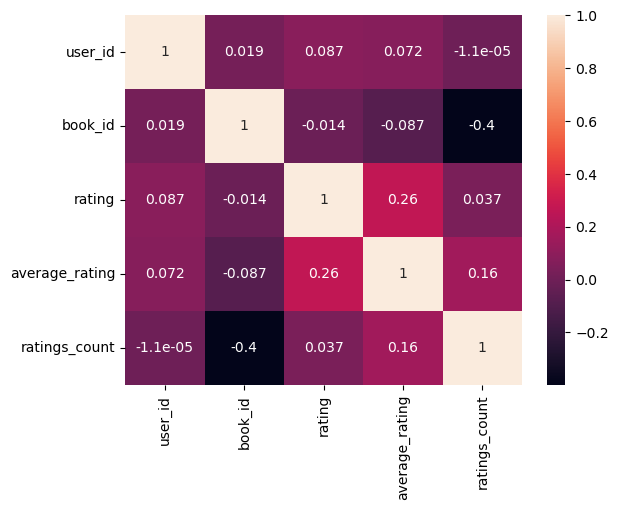

In [154]:
sns.heatmap(ratings_and_books.corr(), annot=True);